In [1]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

In [2]:
# import measurement data
df1 = pd.read_excel(r"C:\Users\lionr\OneDrive\Desktop\Biochemie\PC Praktikum\BOIL\Teil1.xlsx")

In [3]:
df1.head()

,t,T1,T2,p
0,0.0,20.0,25.8,209.4
1,0.5,20.0,25.8,208.8
2,1.0,20.0,25.8,208.8
3,1.5,20.0,25.8,208.9
4,2.0,20.0,25.8,209.0


In [4]:
# drop 'T2'
df1.drop("T2",axis=1)

,t,T1,p
0,0.0,20.0,209.4
1,0.5,20.0,208.8
2,1.0,20.0,208.8
3,1.5,20.0,208.9
4,2.0,20.0,209.0
...,...,...,...
9122,4561.0,80.1,976.5
9123,4561.5,80.1,976.4
9124,4562.0,80.2,976.3
9125,4562.5,80.1,976.4


Text(0, 0.5, 'Pressure [Pa]')

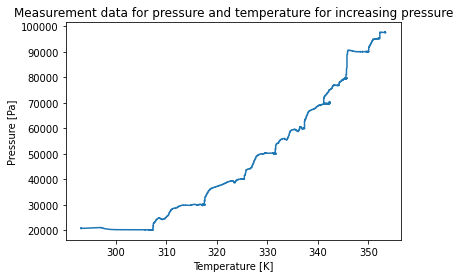

In [5]:
# convert to SI-units and plot
plt.plot([x + 273.15 for x in df1["T1"]],[x * 100 for x in df1["p"]])
plt.title("Measurement data for pressure and temperature for increasing pressure")
plt.xlabel("Temperature [K]")
plt.ylabel("Pressure [Pa]")

In [6]:
df2 = pd.read_excel(r"C:\Users\lionr\OneDrive\Desktop\Biochemie\PC Praktikum\BOIL\Teil2.xlsx")
df2.drop("T2",axis=1)

,t,T1,p
0,0.0,77.4,975.6
1,0.5,77.4,975.7
2,1.0,77.4,975.8
3,1.5,77.4,975.8
4,2.0,77.4,975.8
...,...,...,...
8998,4499.0,33.4,200.2
8999,4499.5,33.4,200.2
9000,4500.0,33.4,200.3
9001,4500.5,33.4,200.5


Text(0, 0.5, 'Pressure [Pa]')

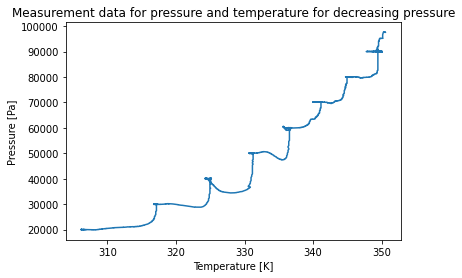

In [7]:
# convert to SI-units and plot
plt.plot([x + 273.15 for x in df2["T1"]],[x * 100 for x in df2["p"]])
plt.title("Measurement data for pressure and temperature for decreasing pressure")
plt.xlabel("Temperature [K]")
plt.ylabel("Pressure [Pa]")

In [8]:
# values for pressure and temperature at boiling point

# increasing pressure
p1 = [200.5,299.8,401.1,499.0,599.3,697.8,795.6,900.6,976.0]
T1 = [34.2,44.4,52.1,58.4,64.2,68.0,72.5,76.9,80.2]
T1_K = [x + 273.15 for x in T1]
p1_Pa = [x * 100 for x in p1]

# decreasing pressure
p2 = [976.0,899.6,800.0,701.4,600.4,501.2,400.4,299.3,200.4]
T2 = [80.2,76.9,72.4,68.1,63.6,58.0,51.9,44.0,33.4]
T2_K = [x + 273.15 for x in T2]
p2_Pa = [x * 100 for x in p2]

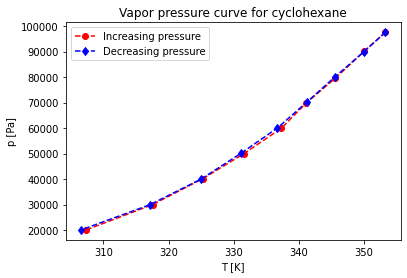

In [9]:
# plotting the vapor pressure curve
plt.plot(T1_K,p1_Pa,'--r',marker='o')
plt.plot(T2_K,p2_Pa,'--b',marker='d')

plt.title("Vapor pressure curve for cyclohexane")
plt.xlabel("T [K]")
plt.ylabel("p [Pa]")
plt.legend(["Increasing pressure","Decreasing pressure"])

In [10]:
# getting the natural logarithm for pressure and inverted temperature, error calculation
print(math.log(math.e))

ln_p1 = [math.log(x) for x in p1_Pa]
T_inv1 = [1/x for x in T1_K]

ln_p2 = [math.log(x) for x in p2_Pa]
T_inv2 = [1/x for x in T2_K]

ln_p_err1 = [10/x for x in p1_Pa]
ln_p_err2 = [10/x for x in p2_Pa]
T_inv_error1 = [(0.1)/(x**2)for x in T1_K]
T_inv_error2 = [(0.1)/(x**2) for x in T2_K]

"""print(p1_Pa)
print(ln_p1)
print(T1_K)"""

print(p2_Pa)
print(ln_p2)
print(T2_K)

"""print(ln_p_err1)
print(ln_p_err2)
print(T_inv_error1)
print(T_inv_error2)"""

1.0
[97600.0, 89960.0, 80000.0, 70140.0, 60040.0, 50120.0, 40040.0, 29930.0, 20040.0]
[11.488632772401184, 11.407120406073252, 11.289781913656018, 11.15824852369417, 11.002766285747398, 10.822175409010004, 10.597634233429156, 10.306616600846745, 9.905485555198801]
[353.34999999999997, 350.04999999999995, 345.54999999999995, 341.25, 336.75, 331.15, 325.04999999999995, 317.15, 306.54999999999995]


'print(ln_p_err1)\nprint(ln_p_err2)\nprint(T_inv_error1)\nprint(T_inv_error2)'

<ErrorbarContainer object of 3 artists>

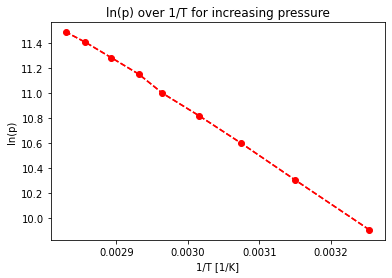

In [11]:
# plotting ln(p) vs 1/T fpr increasing pressure
plt.plot(T_inv1,ln_p1,'--r',marker='o')
plt.title("ln(p) over 1/T for increasing pressure")
plt.xlabel("1/T [1/K]")
plt.ylabel("ln(p)")

plt.errorbar(T_inv1,ln_p1,xerr=T_inv_error1,yerr=ln_p_err1,fmt='--r',ecolor='r')

In [12]:
# extracting the slope
slope1, intercept1 = np.polyfit(T_inv1,ln_p1,1)
print(slope1)

-3767.7666115426737


In [13]:
# calculating vaporization enthalpy for increasing pressure
vap_enthalpy1 = slope1 * -8.314
print(vap_enthalpy1)

31325.21160836579


<ErrorbarContainer object of 3 artists>

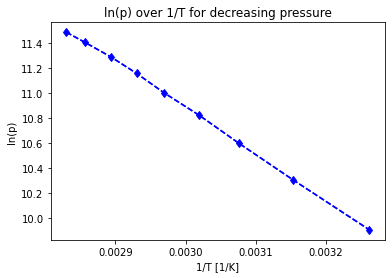

In [14]:
# plotting ln(p) vs 1/T for decreasing pressure
plt.plot(T_inv2,ln_p2,'--b',marker='d')
plt.title("ln(p) over 1/T for decreasing pressure")
plt.xlabel("1/T [1/K]")
plt.ylabel("ln(p)")

plt.errorbar(T_inv2,ln_p2,xerr=T_inv_error2,yerr=ln_p_err2,fmt='--b',ecolor='b')

In [15]:
# extracting the slope
slope2, intercept2 = np.polyfit(T_inv2,ln_p2,1)
print(slope2)

-3710.168706883392


In [16]:
# calculating vaporization enthalpy for decreasing pressure
vap_enthalpy2 = slope2 * -8.314
print(vap_enthalpy2)

30846.34262902852


In [17]:
print(p1_Pa)
p2_Pa_rev = p2_Pa[::-1]
print(p2_Pa_rev)

p_diff = [x - p2_Pa_rev[p1_Pa.index(x)] for x in p1_Pa]
print(max(p_diff))
print(min(p_diff))

[20050.0, 29980.0, 40110.0, 49900.0, 59929.99999999999, 69780.0, 79560.0, 90060.0, 97600.0]
[20040.0, 29930.0, 40040.0, 50120.0, 60040.0, 70140.0, 80000.0, 89960.0, 97600.0]
100.0
-440.0
